In [1]:
import xarray as xr
import numpy as np

from matplotlib import pyplot as plt
import cartopy as cy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from geopy import distance
import math
import re

In [2]:
OPeNDAP_url = 'https://thredds.met.no/thredds/dodsC/fou-hi/mywavewam800m/MyWave_wam800_c2SPC00.nc'
ds =  xr.open_dataset(OPeNDAP_url)
ds

<xarray.Dataset> Size: 12MB
Dimensions:                  (direction: 36, freq: 36, x: 32, y: 1, time: 73)
Coordinates:
  * direction                (direction) float32 144B 5.0 15.0 ... 345.0 355.0
  * freq                     (freq) float32 144B 0.03452 0.03798 ... 0.9702
  * x                        (x) int32 128B 1 2 3 4 5 6 7 ... 27 28 29 30 31 32
  * y                        (y) int32 4B 1
  * time                     (time) datetime64[ns] 584B 2024-12-16T18:00:00 ....
    latitude                 (y, x) float32 128B ...
    longitude                (y, x) float32 128B ...
Data variables:
    forecast_reference_time  datetime64[ns] 8B ...
    SPEC                     (time, y, x, freq, direction) float32 12MB ...
    Pdir                     (time, y, x) float32 9kB ...
    dd                       (time, y, x) float32 9kB ...
    depth                    (y, x) float32 128B ...
    ff                       (time, y, x) float32 9kB ...
    hs                       (time, y, x) float32 9kB ...
    thq_sea                  (time, y, x) float32 9kB ...
    thq_swell                (time, y, x) float32 9kB ...
    tp                       (time, y, x) float32 9kB ...
Attributes:
    title:                           MyWaveWam 800m MidtNorge
    institution:                     Norwegian Meteorological Institute
    source:                          WAM wave model version cycle 4.7.0
    direction_convention:            A direction of 0 degrees means a wave pr...
    history:                         Tue Dec 17 04:32:07 2024: ncks -A -v for...
    history_of_appended_files:       Tue Dec 17 04:32:07 2024: Appended file ...
    NCO:                             netCDF Operators version 4.7.9 (Homepage...
    DODS_EXTRA.Unlimited_Dimension:  time

In [3]:
ds.latitude.min(),ds.latitude.max(),ds.longitude.min(),ds.longitude.max()

(<xarray.DataArray 'latitude' ()> Size: 8B
 array(63.09999466),
 <xarray.DataArray 'latitude' ()> Size: 8B
 array(67.5),
 <xarray.DataArray 'longitude' ()> Size: 8B
 array(7.31998825),
 <xarray.DataArray 'longitude' ()> Size: 8B
 array(14.05995369))

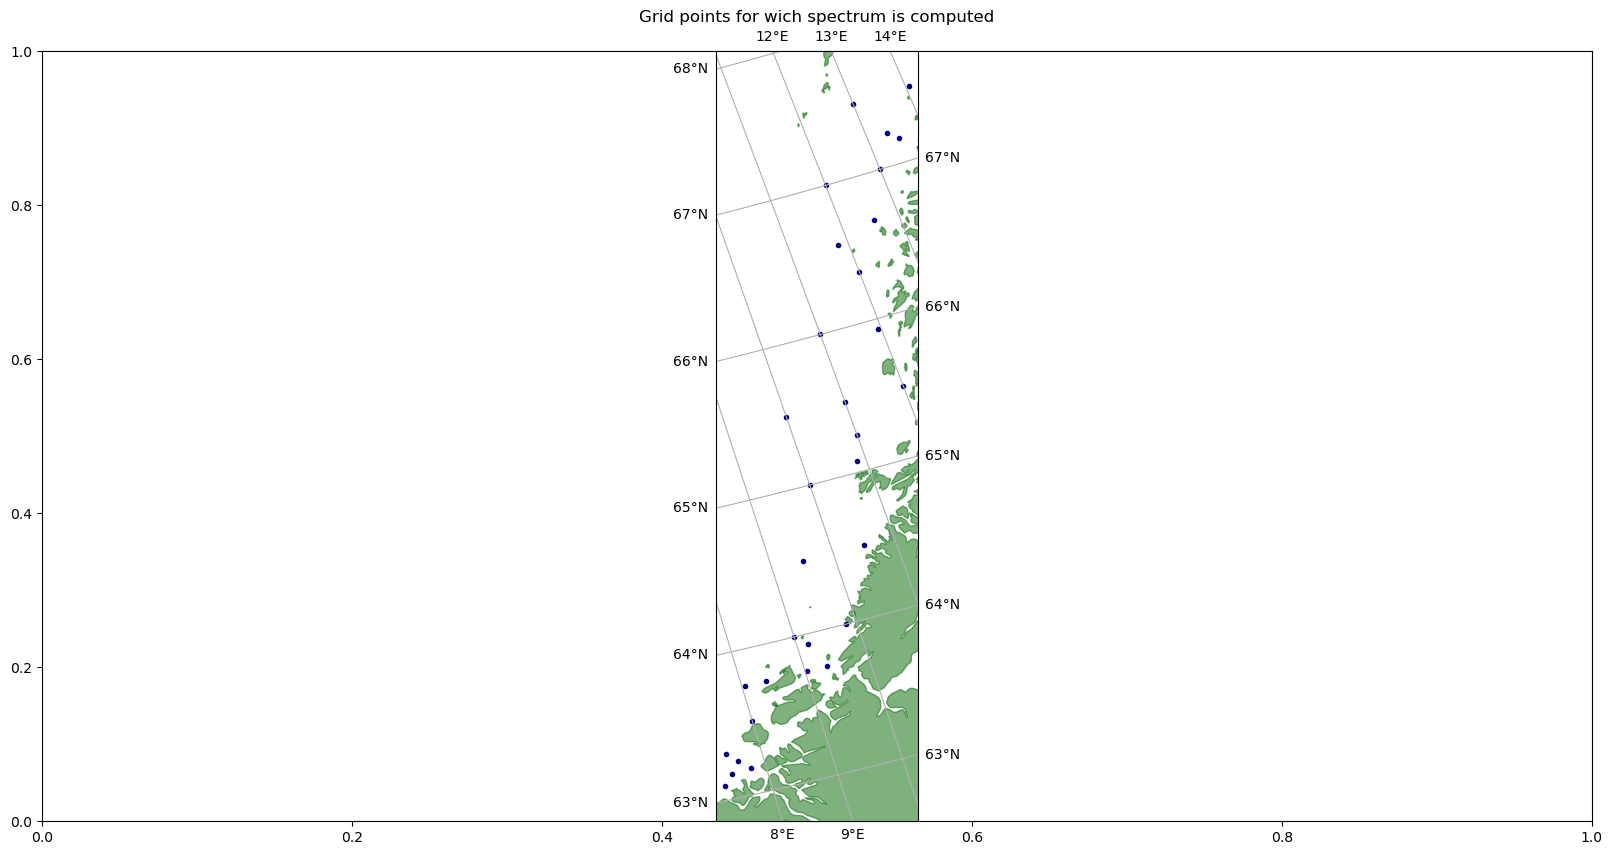

In [4]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = plt.axes(projection=ccrs.Orthographic(-10, 45))
ax.add_feature(cfeature.LAND,color='darkgreen', alpha = 0.5)
#ax.coastlines(resolution='50m', color='darkkhaki', linewidth=0.5)
ax.set_title("Grid points for wich spectrum is computed")
ax.scatter(ds.longitude,ds.latitude,marker='.', color='navy', transform=ccrs.PlateCarree())
ax.gridlines(draw_labels=True)